In [2]:
from SEIR_viral_load import *
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#Define Model Parameters

Pop = 10000
external_rate = 1/Pop
D = list(range(1, 15))
L = [3, 5, 6]
inf_f = logproportional
prev_cutoff = 0.01
se_sample = .95
refusal_rate = 0
asymptomatic = 0.65
results_delay=0
R0 = 2.5
cutoff = 6
I_init= int(0.1*10000)
t_max = 200

In [4]:
infection_dict = {'3' : [], '5' : [], '6' : []}
for l in L:
    for d in D:
        total_inf = 0
        for i in range(20):
            _, _, _, _, _, ext_inf, int_inf = SEIRsimulation_suppression(Pop, external_rate, d, l, inf_f, prev_cutoff, se_sample,
                                                                     refusal_rate, asymptomatic, results_delay, 
                                                                     R0, cutoff, I_init, t_max)
            total_inf = ext_inf + int_inf
        total_inf = total_inf/20
        infection_dict[str(l)].append(total_inf)

In [5]:
infection_df = pd.DataFrame(infection_dict)
infection_df = infection_df.shift(1).iloc[1:]

In [6]:
infection_df

,3,5,6
1,57.70,59.50,59.95
2,65.70,73.80,81.50
3,78.75,106.85,116.70
4,110.55,153.50,174.30
5,167.00,224.35,234.45
6,221.85,272.25,298.15
7,263.35,309.25,320.65
8,300.25,332.90,357.70
9,337.00,373.90,371.85
10,354.15,372.40,378.90


In [7]:
column_dict = {'3' : 'LOD 10^3', '5' : 'LOD 10^5', '6' : 'LOD 10^6'}
infection_df.rename(columns=column_dict, inplace=True)

In [8]:
infection_df_scaled = infection_df/1000

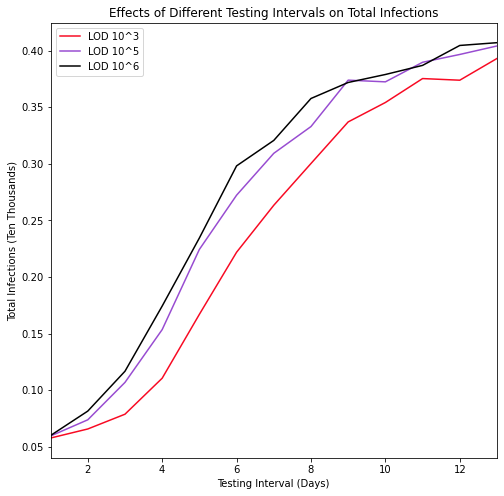

In [9]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlabel("Testing Interval (Days)")
ax.set_ylabel("Total Infections (Ten Thousands)")
ax.set_title("Effects of Different Testing Intervals on Total Infections")
ax.set_xlim(1,13)
ax = sns.lineplot(data = infection_df_scaled, palette=['#F80A23', '#984CD1', 'k'], dashes=False)
fig.savefig(r'Figures\TestingIntervalEffects.png')

In [10]:
r_eff_dict = {'3' : [], '5' : [], '6' : []}
for l in L:
    for d in D:
        r_eff = 0
        for i in range(20):
            r_eff += get_Reff(Pop, d, l, inf_f, asymptomatic, results_delay, R0, cutoff)
        
        r_eff = r_eff/20    
        r_eff_dict[str(l)].append(r_eff)

In [11]:
r_eff_df = pd.DataFrame(r_eff_dict)
r_eff_df = r_eff_df.shift(1).iloc[1:]
column_dict = {'3' : 'LOD 10^3', '5' : 'LOD 10^5', '6' : 'LOD 10^6'}
r_eff_df.rename(columns=column_dict, inplace=True)

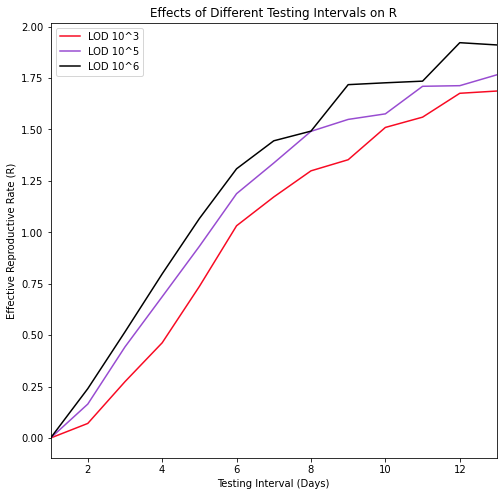

In [13]:
fig2, ax2 = plt.subplots(figsize=(8,8))
ax2.set_xlabel("Testing Interval (Days)")
ax2.set_ylabel("Effective Reproductive Rate (R)")
ax2.set_title("Effects of Different Testing Intervals on R")
ax2.set_xlim(1,13)
ax2 = sns.lineplot(data = r_eff_df, palette=['#F80A23', '#984CD1', 'k'], dashes=False)
fig2.savefig(r'Figures\TestingIntervalEffectsReff.png')